In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Q1

In [46]:

try:
    df = pd.read_csv("election_data.csv")
except FileNotFoundError:
    data = {
    'State': ['Madhya Pradesh', 'Madhya Pradesh', 'Madhya Pradesh', 'Madhya Pradesh',
              'Rajasthan', 'Rajasthan', 'Rajasthan', 'Rajasthan'],
    'Party': ['BJP', 'INC', 'BSP', 'Others',
              'BJP', 'INC', 'BSP', 'Others'],
    'Seats_Won': [163, 66, 0, 1, 115, 69, 2, 13],
    'Total_Seats': [230, 230, 230, 230, 200, 200, 200, 200],
    'Voter_Turnout (%)': [72.1, 72.1, 72.1, 72.1, 74.2, 74.2, 74.2, 74.2]
    }
    df = pd.DataFrame(data)
    df.to_csv("election_data.csv", index = False)
    print("file has been created")
df

,State,Party,Seats_Won,Total_Seats,Voter_Turnout (%)
0,Madhya Pradesh,BJP,163,230,72.1
1,Madhya Pradesh,INC,66,230,72.1
2,Madhya Pradesh,BSP,0,230,72.1
3,Madhya Pradesh,Others,1,230,72.1
4,Rajasthan,BJP,115,200,74.2
5,Rajasthan,INC,69,200,74.2
6,Rajasthan,BSP,2,200,74.2
7,Rajasthan,Others,13,200,74.2


In [47]:
try:
    df['Seats_Percentage'] = df['Seats_Won']/df['Total_Seats']*100
except KeyError:
    print("Names of the some columns are not correct in the already present csv file")
df

,State,Party,Seats_Won,Total_Seats,Voter_Turnout (%),Seats_Percentage
0,Madhya Pradesh,BJP,163,230,72.1,70.869565
1,Madhya Pradesh,INC,66,230,72.1,28.695652
2,Madhya Pradesh,BSP,0,230,72.1,0.000000
3,Madhya Pradesh,Others,1,230,72.1,0.434783
4,Rajasthan,BJP,115,200,74.2,57.500000
5,Rajasthan,INC,69,200,74.2,34.500000
6,Rajasthan,BSP,2,200,74.2,1.000000
7,Rajasthan,Others,13,200,74.2,6.500000


In [48]:
try:
    idx = df.groupby('State')['Seats_Won'].idxmax()
    result = df.loc[idx, ['State', 'Party', 'Seats_Won']]
    for i, row in result.iterrows():
       print(f"Max seat won in {row['State']} is {row['Seats_Won']} by {row['Party']}")
except KeyError:
    print("Names of the some columns are not correct in the already present csv file")

Max seat won in Madhya Pradesh is 163 by BJP
Max seat won in Rajasthan is 115 by BJP


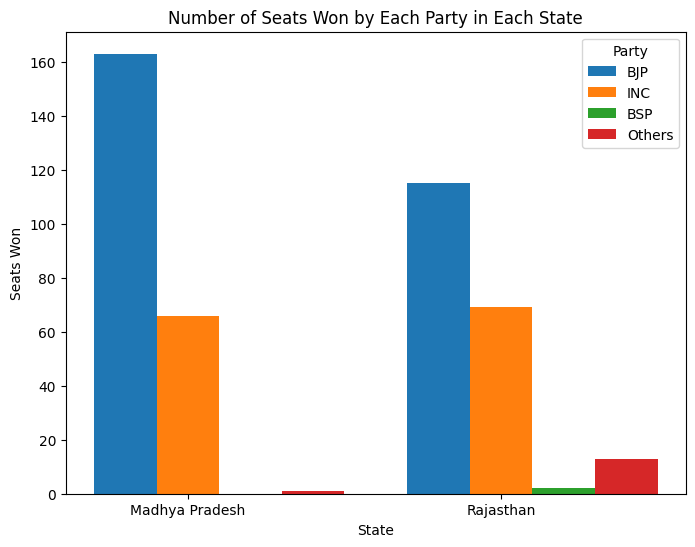

In [49]:
try:
    fig, ax = plt.subplots(figsize=(8, 6))
    state = df['State'].unique()
    parties = df['Party'].unique()
    bar_width = 0.2
    positions = list(range(len(state)))
    party_offsets = {
        party: i * bar_width for i, party in enumerate(parties)
    }
    for party in parties:
        party_data = df[df['Party'] == party]
        ax.bar(
            [p + party_offsets[party] for p in positions],
            party_data['Seats_Won'],
            bar_width,
            label=party
        )
    ax.set_xlabel('State')
    ax.set_ylabel('Seats Won')
    ax.set_title('Number of Seats Won by Each Party in Each State')
    ax.set_xticks([p + bar_width for p in positions])
    ax.set_xticklabels(state)
    ax.legend(title='Party')
    plt.show()
except KeyError:
    print("Names of the some columns are not correct in the already present csv file")
    plt.close('all')